<img src="../img/Logo.png" width="300">

# Los Filtros en las CNN - P1
### Asignatura: Computer Vision

### Profesor: Jorge Calvo

In [87]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import plot_model
import random

import os
print("TensorFlow version:", tf.__version__)

# Configurar el crecimiento de memoria en la GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
print("GPUs disponibles: ", tf.config.experimental.list_physical_devices('GPU'))

TensorFlow version: 2.13.1
GPUs disponibles:  []


In [69]:
# Personalizar los filtros

# Definir los kernels

def create_kernel_r(num_arrays):
    kernel=[]
    c=2
    #array = np.random.randint(-1,1,size=(3, 3))
    for _ in range(num_arrays):
        array= np.array([[c, c, -1], [0, c, -1], [c, 1, -1]])
        kernel.append(array)
        c=random.randint(-1,1)
    return kernel

n_kernels= 4*3
size_kernel= (3,3)
kernels=create_kernel_r(n_kernels)

#aplicar Kernle personalizado
#kernel_initializer=tf.keras.initializers.Constant(kernels)


In [70]:
kernels[:3]

[array([[ 2,  2, -1],
        [ 0,  2, -1],
        [ 2,  1, -1]]),
 array([[-1, -1, -1],
        [ 0, -1, -1],
        [-1,  1, -1]]),
 array([[-1, -1, -1],
        [ 0, -1, -1],
        [-1,  1, -1]])]

In [71]:
sigm = (lambda x:1/(1+np.e**(-x)))
cosh = (lambda x: (np.e**(x) + np.e**(-x))/2)
tanh = (lambda x: (np.e**(x) - np.e**(-x))/(np.e**(x) + np.e**(-x)), lambda x: 1/cosh(x)**2)
swish=(lambda x: x*sigm(x))

In [88]:
# Crear el modelo secuencial
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(4, size_kernel, activation=sigm, padding='same', name="Conv1",input_shape=(256, 256, 3),kernel_initializer=tf.keras.initializers.Constant(kernels)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(6, size_kernel, activation=tanh[0],padding='same',name="Conv2",),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(8, size_kernel, activation=swish,padding="valid",strides=(2,2),name="Conv3",),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [89]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 256, 256, 4)       112       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 128, 128, 4)       0         
 ng2D)                                                           
                                                                 
 Conv2 (Conv2D)              (None, 128, 128, 6)       222       
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 64, 64, 6)         0         
 ng2D)                                                           
                                                                 
 Conv3 (Conv2D)              (None, 31, 31, 8)         440       
                                                                 
 flatten_16 (Flatten)        (None, 7688)            

In [90]:
plot_model(model, to_file='./red_convolucional_2.png', show_shapes=True, show_layer_names=True, dpi=96)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


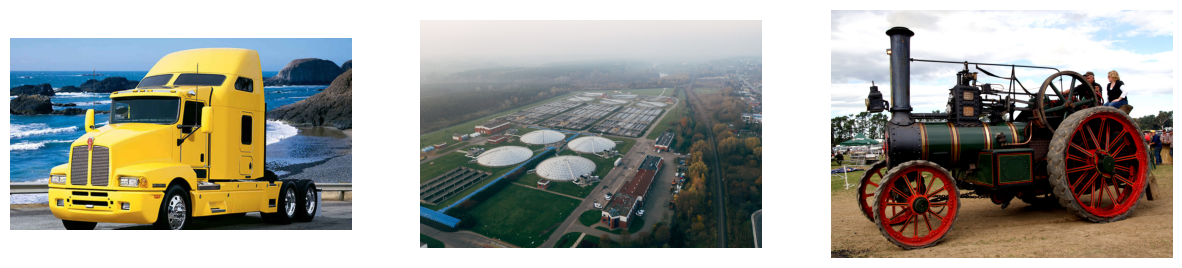

In [91]:
# Lista de rutas de las imágenes
image_paths = ['../images/camion.jpg', '../images/land.jpg', '../images/tractor.jpg']

# Crear una figura con tres subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Iterar sobre las rutas de las imágenes y los subplots
for ax, path in zip(axes, image_paths):
    cuadro = plt.imread(path)
    ax.axis("off")
    ax.imshow(cuadro)

# Mostrar la figura con las tres imágenes
plt.show()

1/1 [==============================] - 0s 115ms/step


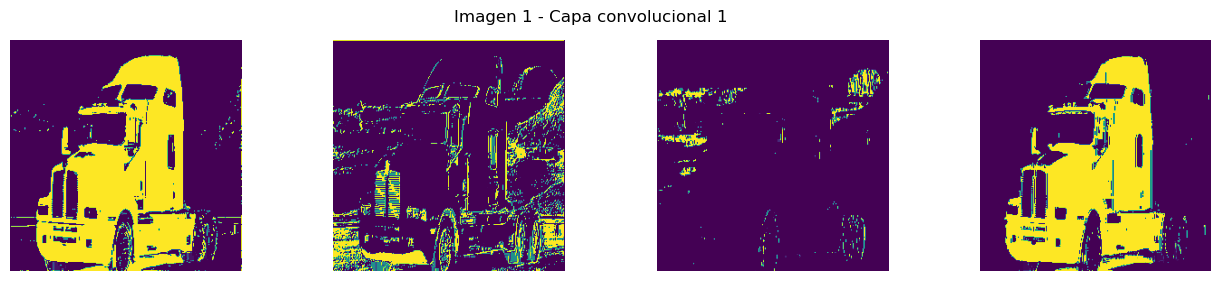

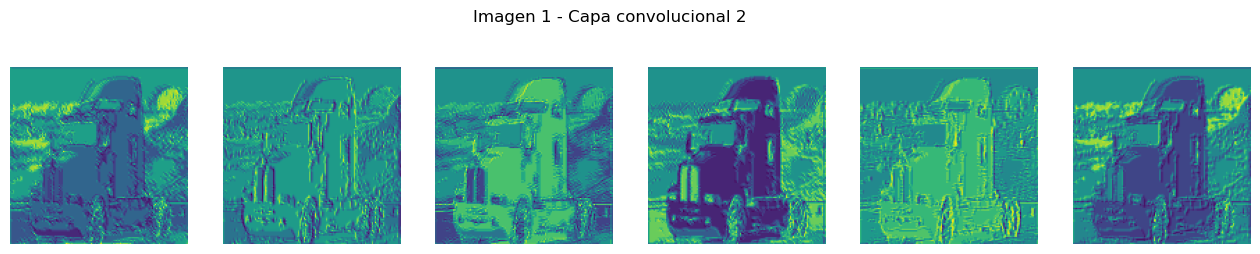

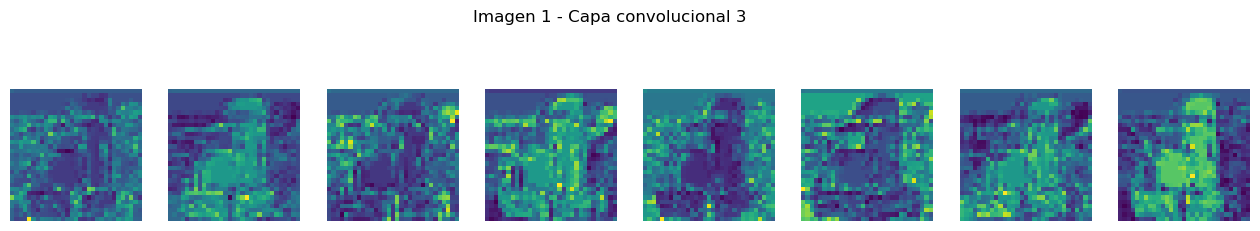

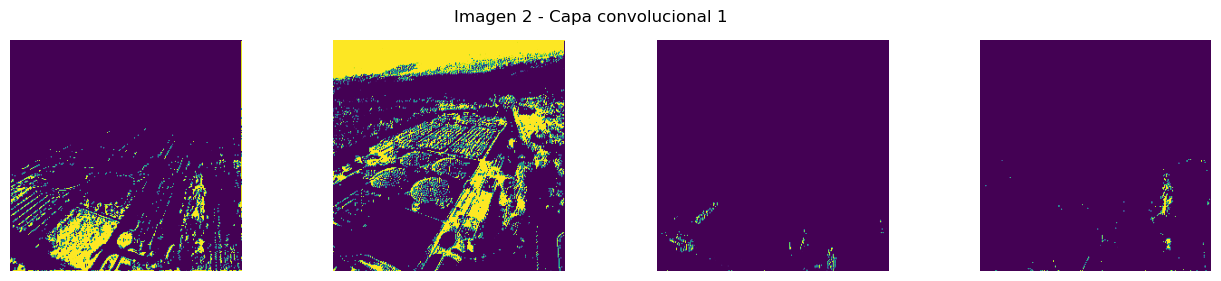

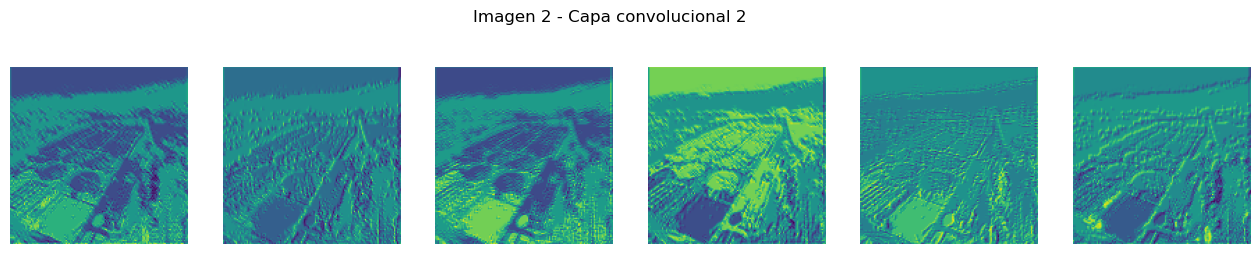

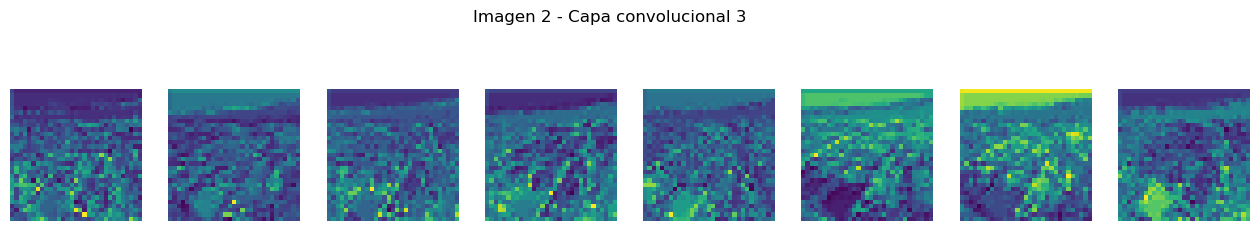

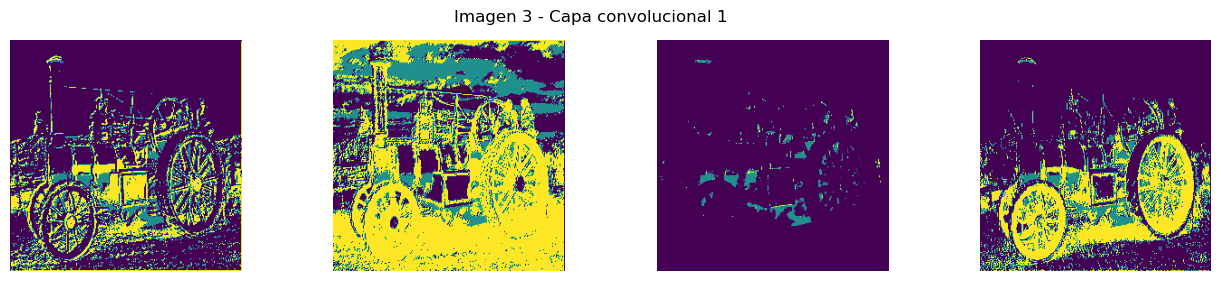

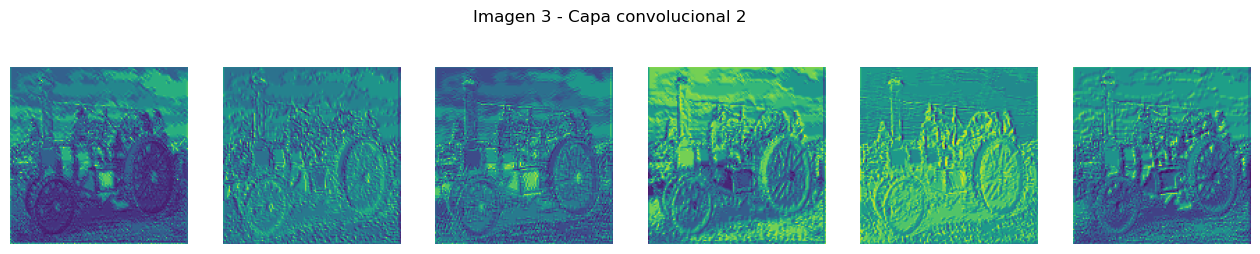

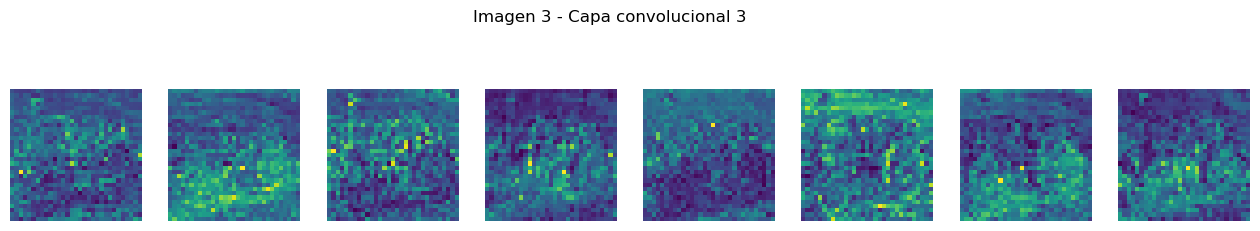

In [92]:
# Cargar y preprocesar las imágenes de ejemplo
image_paths = ['../images/camion.jpg', '../images/land.jpg', '../images/tractor.jpg']
images = []
for path in image_paths:
    image = tf.keras.preprocessing.image.load_img(path, target_size=(256,256))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    images.append(image)

images = np.vstack(images)

# Obtener las salidas de las capas convolucionales
conv_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
conv_outputs = [layer.output for layer in conv_layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=conv_outputs)
activations = activation_model.predict(images)

# Visualizar las características de cada capa convolucional para cada imagen
for i in range(len(images)):
    for j, activation in enumerate(activations):
        fig, axes = plt.subplots(1, activation.shape[-1], figsize=(16, 3))
        fig.suptitle('Imagen {} - Capa convolucional {}'.format(i+1, j+1))
        
        for k, ax in enumerate(axes.flat):
            ax.imshow(activation[i, :, :, k])
            ax.axis('off')
        
        plt.show()
